# contents
1. data was imported from the 'Sentence' notebook that was already cleaned
2. check the sentiment of a song using TextBlob
3. sentiment was plotted for the whole song on one graph
5. polarity of each song is graphed
6. word cloud shows the most common words
7. Kmeans on the polarity & subjectivity of the songs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data_clean = pd.read_csv('wholeSong_df_clean.csv')

### Use TextBlob to find the sentement of the whole song

In [4]:
from textblob import TextBlob## Textblob assigns sentiment scores to text.

pol=lambda x: TextBlob(x).sentiment.polarity
sub=lambda x: TextBlob(x).sentiment.subjectivity

data_clean['polarity']=data_clean['lyrics'].apply(pol)
data_clean['subjectivity']=data_clean['lyrics'].apply(sub)

In [5]:
data_clean.iloc[0:9]

,Unnamed: 0,lyrics,artist,genre,polarity,subjectivity
0,0,it aint even cold outside not where im from f...,ariana_grande,pop,-0.331250,0.756250
1,1,theres a fire starting in my heart reaching a ...,ariana_grande,pop,0.126496,0.535470
2,2,every day im grindin i dont even get a weekend...,ariana_grande,pop,-0.003030,0.452225
3,3,ariana grande i love the way you make me feel ...,ariana_grande,pop,0.253216,0.560819
4,4,someday ill let you in treat you right drive y...,ariana_grande,pop,0.064443,0.503536
5,5,intro wendy rene after laughter comes tears ...,ariana_grande,pop,-0.059208,0.580464
6,6,ariana grande i looked in the rearview mirror ...,ariana_grande,pop,-0.029954,0.452304
7,7,intro greedy you know that im greedy for lov...,ariana_grande,pop,0.413793,0.631034
8,8,id like to say we gave it a try id like to bla...,ariana_grande,pop,0.201143,0.435143


In [6]:
data_clean.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
data_clean.head(1)

,lyrics,artist,genre,polarity,subjectivity
0,it aint even cold outside not where im from f...,ariana_grande,pop,-0.33125,0.75625


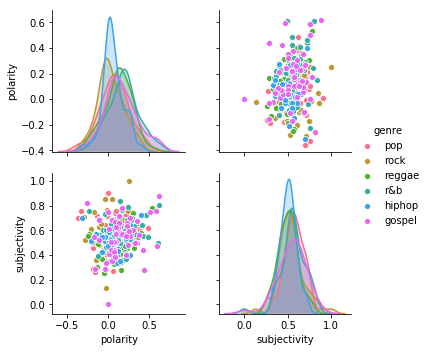

In [8]:
import seaborn as sns
# sns.set(style="darkgrid")
plt.rcParams['figure.figsize'] = [20, 20]
plt.rcParams.update({'font.size': 10})
sns.pairplot(data_clean, hue='genre', palette="husl")

### Plot the song based on the sentiment.

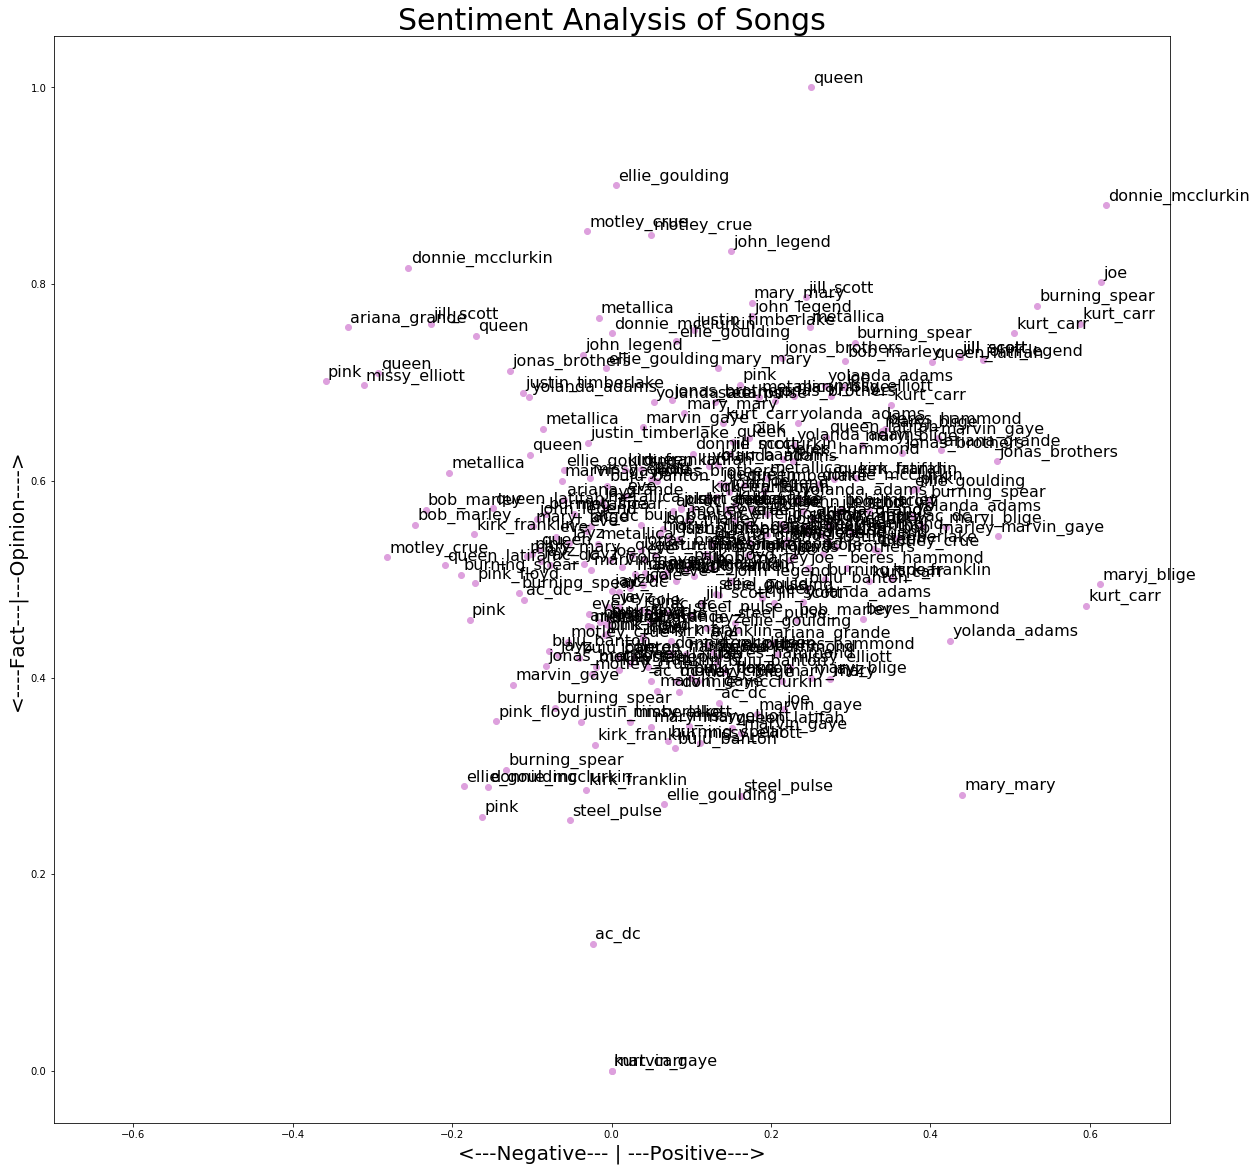

In [9]:
plt.rcParams['figure.figsize'] = [20, 20]
for index, art in enumerate(data_clean.index):
    x = data_clean.polarity.loc[art]
    y = data_clean.subjectivity.loc[art]
    plt.scatter(x, y, color='plum')
    plt.text(x+0.003, y+0.005, data_clean['artist'][index], fontsize=16)
plt.xlim(-.7, 0.7)
plt.title('Sentiment Analysis of Songs', fontsize=30)
plt.xlabel('<---Negative--- | ---Positive--->', fontsize=20)
plt.ylabel('<----Fact---|---Opinion---->', fontsize=20)
plt.show()

_The majority of the songs are close to the middle of the graph.  I am shocked to see a some songs that are considered negative such as a few gopsel songs._

_I will plot the song on separate graphs to see the polarity clearly._

### we can plot the polarity of each song

In [10]:
text = data_clean['lyrics'][0]
length = len(text)
size = math.floor(length/10)
start = range(0, length, size)
split_list = []
for piece in range(0):
    split_list.append(text[start[piece]:start[piece]+size])

In [11]:
import numpy as np
import math


def split_text(text, n=10):
    length = len(text)
    size = math.floor(length/n)
    start = np.arange(0, length, size)

    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [12]:
list_pieces = []
for l in data_clean.lyrics:
    split = split_text(l)
    list_pieces.append(split)

In [13]:
polarity_lyric = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_lyric.append(polarity_piece)

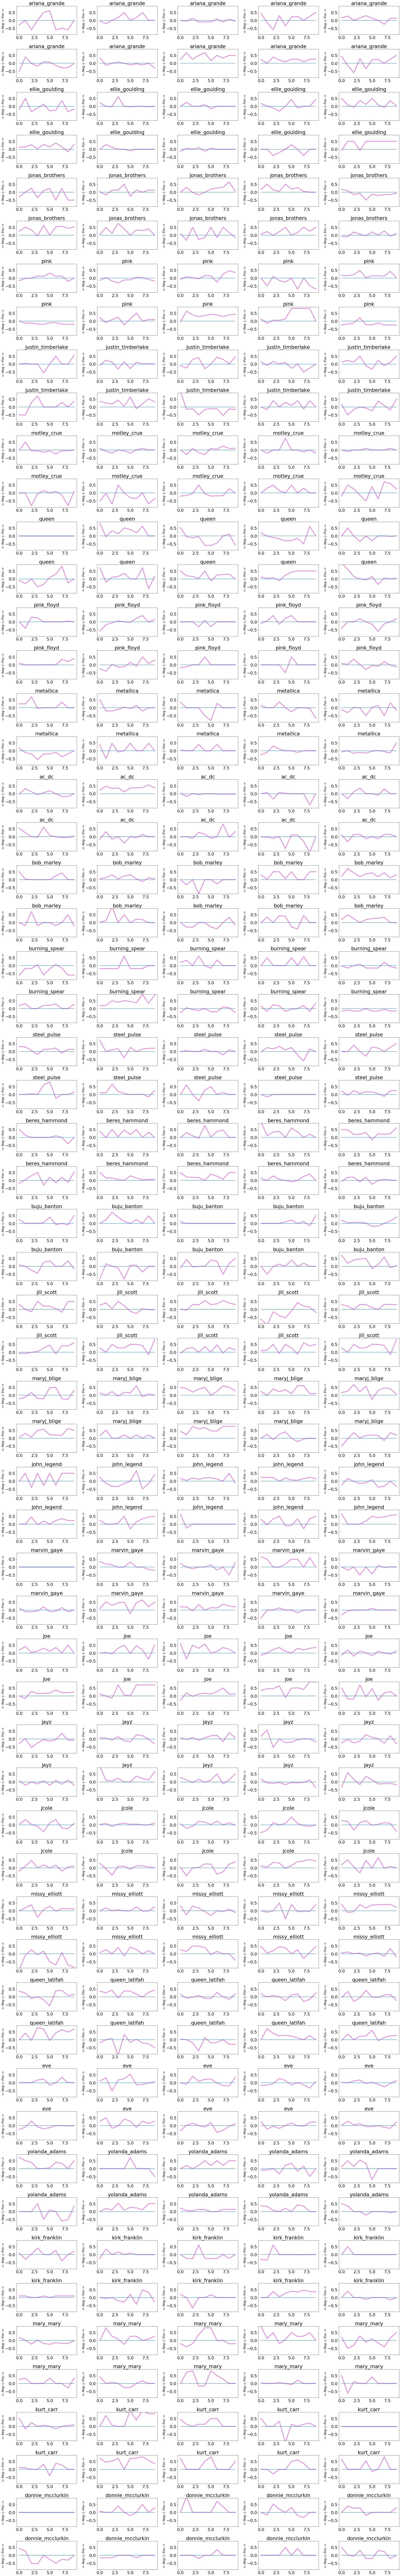

In [14]:
plt.rcParams['figure.figsize'] = (30, 190)
plt.rcParams.update({'font.size': 22})
for index, artist in enumerate(data_clean.index):
    plt.subplot(60, 5, index+1)
    plt.plot(polarity_lyric[index], color='plum', linewidth=5)
    plt.plot(np.arange(0, 10), np.zeros(10))
    plt.title(data_clean['artist'][index])
    plt.ylabel('<--Neg--|--Pos-->', fontsize=15)
    plt.ylim(bottom=-.9, top=0.9)
    plt.tight_layout()
plt.show()

_The graphs above show the polarity of each song.  
Any value above the median is positive and below is negative. 
There are three songs that are neutral._

_Marvin Gayes first song is 'You are everything'.  
IF we take the first verse we can see that there 
are no "negative" words: '

Cause you are everything
And everything is you
Oh, you are everything
And everything is you
You are everything
And everything is you_

_Now if we look at one of his "negative songs", 
Ain't No Mountain High Enough(song 5), the first verse is:

Listen, baby
Ain't no mountain high
Ain't no valley low
Ain't no river wide enough, baby_

_So we can see why they both are negative and positive.  
The word ain't can be seen as negative._

---

In [15]:
data_clean.head()

,lyrics,artist,genre,polarity,subjectivity
0,it aint even cold outside not where im from f...,ariana_grande,pop,-0.331250,0.756250
1,theres a fire starting in my heart reaching a ...,ariana_grande,pop,0.126496,0.535470
2,every day im grindin i dont even get a weekend...,ariana_grande,pop,-0.003030,0.452225
3,ariana grande i love the way you make me feel ...,ariana_grande,pop,0.253216,0.560819
4,someday ill let you in treat you right drive y...,ariana_grande,pop,0.064443,0.503536


### Use wordcloud to visualize the most common words in the dataset

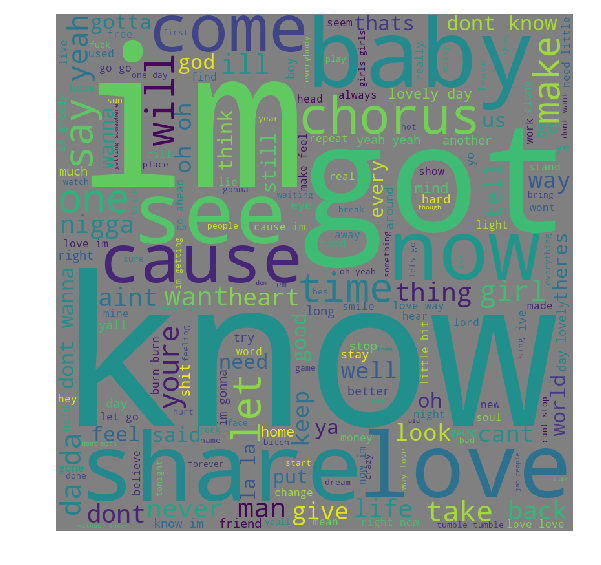

In [16]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = set(STOPWORDS)

# iterate through the csv file
for word in data_clean.lyrics:

    # split the value
    tokens = word.split()

    for words in tokens:
        comment_words = comment_words + words + ' '


wordcloud = WordCloud(width=800, height=800,
                      background_color='grey',
                      stopwords=stopwords,
                      min_font_size=10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

_So the most common word is 'know' and 'im'.  I would think that these were filtered out as they seem a bit common to me._

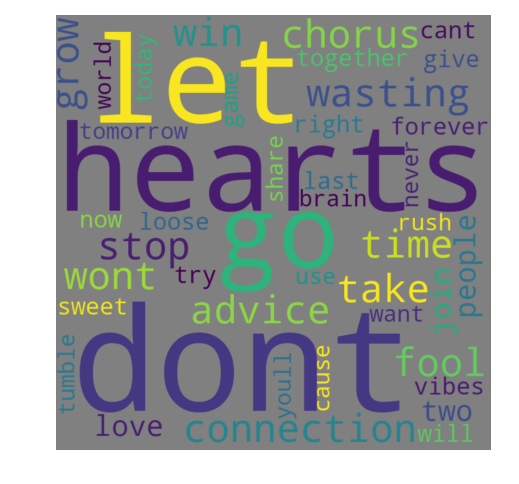

In [17]:
# Pick one song to see the most common words of the song
tx = data_clean.lyrics[130]
wordcloud = WordCloud(width=800, height=800,
                      background_color='grey',
                      stopwords=stopwords,
                      min_font_size=10).generate(tx)
# Display the generated image:
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

_The first song the most common word is 'dont'.  It would be interesting to see what the most common words are per genre.  I will add this at a later time._

---

# KMeans on sentiment of the lyrics
_I wanted to see what the lyric clusters look like for polarity and sentiment._

In [18]:
data_clean.head(2)

,lyrics,artist,genre,polarity,subjectivity
0,it aint even cold outside not where im from f...,ariana_grande,pop,-0.331250,0.75625
1,theres a fire starting in my heart reaching a ...,ariana_grande,pop,0.126496,0.53547


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_clean['lyrics'], data_clean['polarity'],
                                                    test_size=0.25, random_state=99)

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.5, min_df=1, stop_words='english')

In [61]:
X_train_tf = vectorizer.fit_transform(X_train)
X_test_tf = vectorizer.transform(X_test)

In [62]:
# function to determine K
def kClusters(X):
    plt.rcParams['figure.figsize'] = [9, 5]

    squaredSums = []
    K = range(1, 25)
    for k in K:
        kmeanModel = KMeans(n_clusters=k)
        kmeanModel = kmeanModel.fit(X)
        squaredSums.append(kmeanModel.inertia_)

    # Plot the elbow
    plt.plot(K, squaredSums, 'bx-')
    plt.xlabel('k')
    plt.ylabel('squaredSums')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

In [82]:
# Find the clusters and plot them
from sklearn.cluster import KMeans, MiniBatchKMeans, MeanShift, SpectralClustering, AffinityPropagation
from sklearn.decomposition import TruncatedSVD  # a form of PCA for NLP
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer, normalize
from sklearn.cluster import estimate_bandwidth
sns.set(style="darkgrid")


def clusterModels(X, y, k):
    fig, ax = plt.subplots(1, 4, figsize=(20, 6))
    plt.rcParams.update({'font.size': 15})
    models = []
    names = []
    plt_num = []

    # Normalize the data.
    svd = TruncatedSVD(75)
    lsa = make_pipeline(svd, Normalizer(copy=False))

    # Run SVD on the training data, then project the training data.
    X_train_lsa = lsa.fit_transform(X)

    bandwidth = estimate_bandwidth(X_train_lsa, quantile=0.2, n_samples=50)

    models.append((0, 'KMeans', KMeans(n_clusters=k, init='k-means++')))
    models.append((1, 'MeanShift', MeanShift(
        bandwidth=bandwidth, bin_seeding=True)))
    models.append((2, 'Spectral', SpectralClustering(n_clusters=k)))
    models.append((3, 'Affinity', AffinityPropagation()))

    for plt_num, name, model in models:
        names.append(name)
        model.fit(X_train_lsa)
        labels = model.labels_

        ax[plt_num].set_title(name)
        ax[plt_num].scatter(X_train_lsa[:, 0], X_train_lsa[:, 1], c=labels)
        print(name)
        print(pd.crosstab(y, labels), '\n\n')

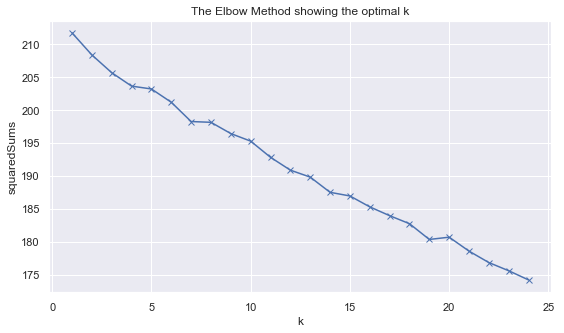

In [43]:
# find k
kClusters(X_train_tf)

#### the elbow method couldn't find the best k, so I will choose 7

KMeans
col_0      0  1  2  3  4  5  6
polarity                      
-0.358775  0  0  0  1  0  0  0
-0.331250  0  0  0  0  0  0  1
-0.311108  0  1  0  0  0  0  0
-0.292449  0  0  0  0  0  0  1
-0.255000  0  0  0  1  0  0  0
-0.246296  0  0  0  0  0  1  0
-0.233333  0  0  0  0  0  0  1
-0.226800  0  0  1  0  0  0  0
-0.209135  0  0  1  0  0  0  0
-0.203571  0  0  0  0  0  0  1
-0.188636  0  0  0  0  0  1  0
-0.185714  0  0  0  1  0  0  0
-0.178148  0  0  0  0  0  0  1
-0.172727  0  0  0  1  0  0  0
-0.162034  0  0  1  0  0  0  0
-0.148742  0  0  0  1  0  0  0
-0.144444  0  0  0  0  0  0  1
-0.132383  0  0  0  1  0  0  0
-0.127834  0  0  0  1  0  0  0
-0.123377  0  0  0  0  0  0  1
-0.115517  0  0  0  1  0  0  0
-0.111184  0  0  0  0  0  0  1
-0.109912  0  0  1  0  0  0  0
-0.103750  0  0  0  0  0  0  1
-0.102941  0  0  0  0  0  0  1
-0.100084  0  0  0  1  0  0  0
-0.098205  0  0  0  1  0  0  0
-0.093332  0  0  1  0  0  0  0
-0.091667  0  0  0  0  0  0  1
-0.088817  0  1  0  0  0  0  0
.

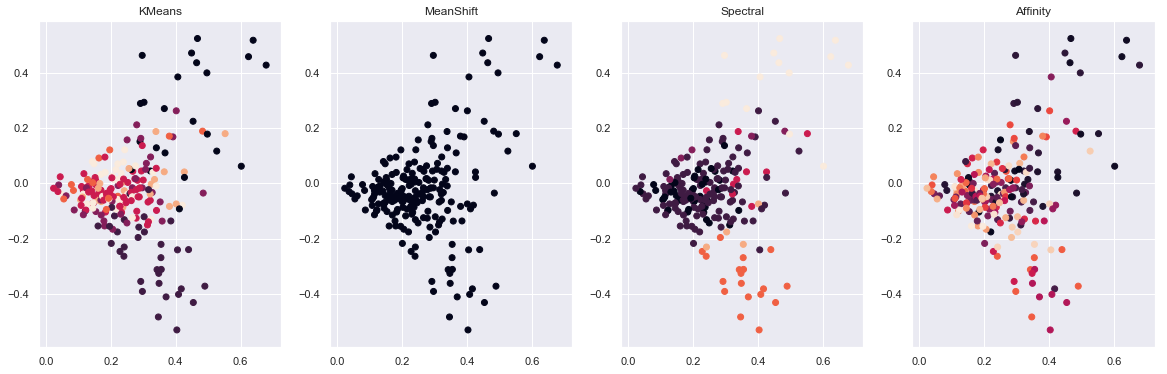

In [83]:
clusterModels(X_train_tf, y_train, 7)

Clustering on sentiment doesn't predict that well

In [92]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(data_clean['lyrics'], data_clean['subjectivity'],
                                                        test_size=0.25, random_state=99)

In [93]:
vectorizer1 = TfidfVectorizer(max_df=0.5, min_df=5, stop_words='english')

In [94]:
X_train_tf1 = vectorizer1.fit_transform(X_train1)
X_test_tf1 = vectorizer1.transform(X_test1)

KMeans
col_0         0  1  2  3  4  5
subjectivity                  
0.129469      1  0  0  0  0  0
0.254630      0  0  0  1  0  0
0.258147      1  0  0  0  0  0
0.271154      0  0  1  0  0  0
0.280000      1  0  0  0  0  0
0.281019      1  0  0  0  0  0
0.289286      0  0  1  0  0  0
0.305848      1  0  0  0  0  0
0.327937      0  0  1  0  0  0
0.333299      0  0  0  0  0  1
0.343232      1  0  0  0  0  0
0.348804      0  0  1  0  0  0
0.350000      1  0  0  0  0  0
0.351104      0  0  0  0  0  1
0.354775      0  0  0  0  0  1
0.355556      0  0  0  0  0  1
0.362667      0  0  0  1  0  0
0.367880      0  0  0  0  1  0
0.369336      1  0  0  0  0  0
0.374495      1  0  0  0  0  0
0.386343      0  0  1  0  0  0
0.392857      0  0  0  0  0  1
0.396057      0  0  0  0  0  1
0.396429      0  1  0  0  0  0
0.396875      0  0  0  0  0  1
0.400000      1  0  0  0  0  0
0.400000      0  0  1  0  0  0
0.403704      1  0  0  0  0  0
0.406566      0  1  0  0  0  0
0.407581      1  0  0  0  0  0
.

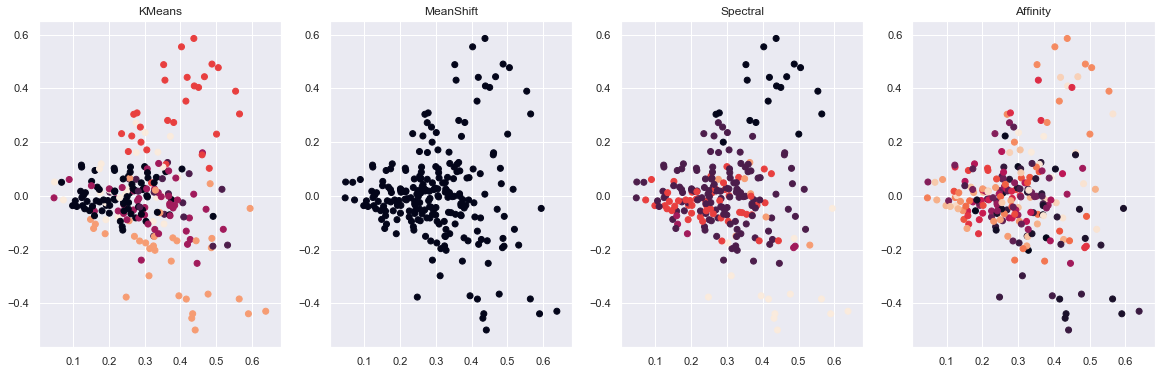

In [95]:
clusterModels(X_train_tf1, y_train1, 6)